In [21]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [5]:
df_data = pd.read_csv('../data/all_contexts.csv')

In [6]:
df_data.head()

,Unnamed: 0,video_id,Location,Activity,Video description,superseded_gcp_name_feb25,video_path
0,0,00370002_2024-11-23_3_ea4201970f_processed_000...,hallway,playing,The video starts with a view of a hallway with...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...
1,1,00370002_2024-11-23_3_ea4201970f_processed_001...,living room,playing,A woman is sitting on the floor playing with a...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...
2,2,00370002_2024-11-23_3_ea4201970f_processed_002...,living room,reading,A person is sitting on the floor and reading a...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...
3,3,00370002_2024-11-23_3_ea4201970f_processed_003...,living room,playing,A young child is sitting on the floor in a liv...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...
4,4,00370002_2024-11-23_3_ea4201970f_processed_004...,living room,playing,A woman and two children are playing with wood...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...,/ccn2/dataset/babyview/unzip_2025_10s_videos_2...


In [11]:
df_data.shape[0]

140935

In [16]:
df_clean = df_data.dropna(subset=['Video description'])
embeds = model.encode(df_clean['Video description'].tolist())

In [20]:
tsne = TSNE(n_components=2, random_state=42)
embeds_tsne = tsne.fit_transform(embeds)
df_clean['tsne_x'] = embeds_tsne[:, 0]
df_clean['tsne_y'] = embeds_tsne[:, 1]
df_clean.head()
df_clean.to_csv('../data/all_contexts_tsne.csv', index=False)

/tmp/ipykernel_3208277/2498797599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tsne_x'] = embeds_tsne[:, 0]
/tmp/ipykernel_3208277/2498797599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['tsne_y'] = embeds_tsne[:, 1]


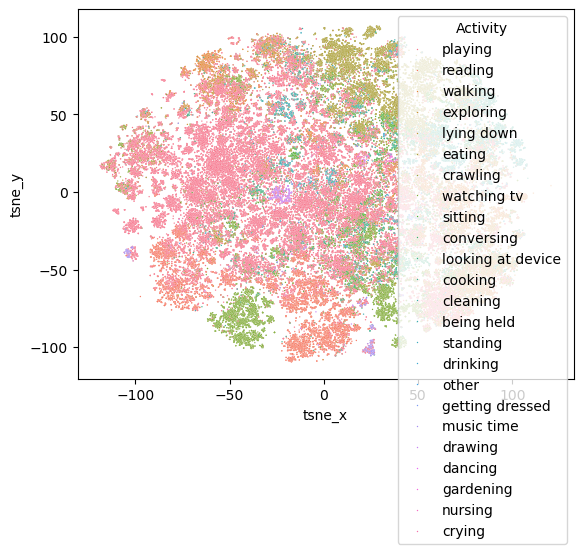

In [25]:
sns.scatterplot(x='tsne_x', y='tsne_y', hue='Activity', data=df_clean, s=1)
plt.show()